![](http://image.noelshack.com/fichiers/2019/06/1/1549295827-0-0000.png)


## Cork Institute of Technology

### MSc in Data Science and Analytics

## Applied Machine Learning 
## Project 2 Assignment

#### Givaldo Francisco S Jr

R00182595





Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [323]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import squarify
from yellowbrick.classifier import DiscriminationThreshold
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
data = pd.read_csv('diabetes.csv')#Loading dataset with pandas (pd)

In [325]:
display(data.info(),data.head(10).T)  # print the first 10 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

0       1        2       3        4        5  \
Pregnancies                 6.000   1.000    8.000   1.000    0.000    5.000   
Glucose                   148.000  85.000  183.000  89.000  137.000  116.000   
BloodPressure              72.000  66.000   64.000  66.000   40.000   74.000   
SkinThickness              35.000  29.000    0.000  23.000   35.000    0.000   
Insulin                     0.000   0.000    0.000  94.000  168.000    0.000   
BMI                        33.600  26.600   23.300  28.100   43.100   25.600   
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288    0.201   
Age                        50.000  31.000   32.000  21.000   33.000   30.000   
Outcome                     1.000   0.000    1.000   0.000    1.000    0.000   

                               6        7        8        9  
Pregnancies                3.000   10.000    2.000    8.000  
Glucose                   78.000  115.000  197.000  125.000  
BloodPressure             50.000    0.000   70.000   96.000  
SkinThickness             32.000    0.000   45.000    0.000  
Insulin                   88.000    0.000  543.000    0.000  
BMI                       31.000   35.300   30.500    0.000  
DiabetesPedigreeFunction   0.248    0.134    0.158    0.232  
Age                       26.000   29.000   53.000   54.000  
Outcome                    1.000    0.000    1.000    1.000

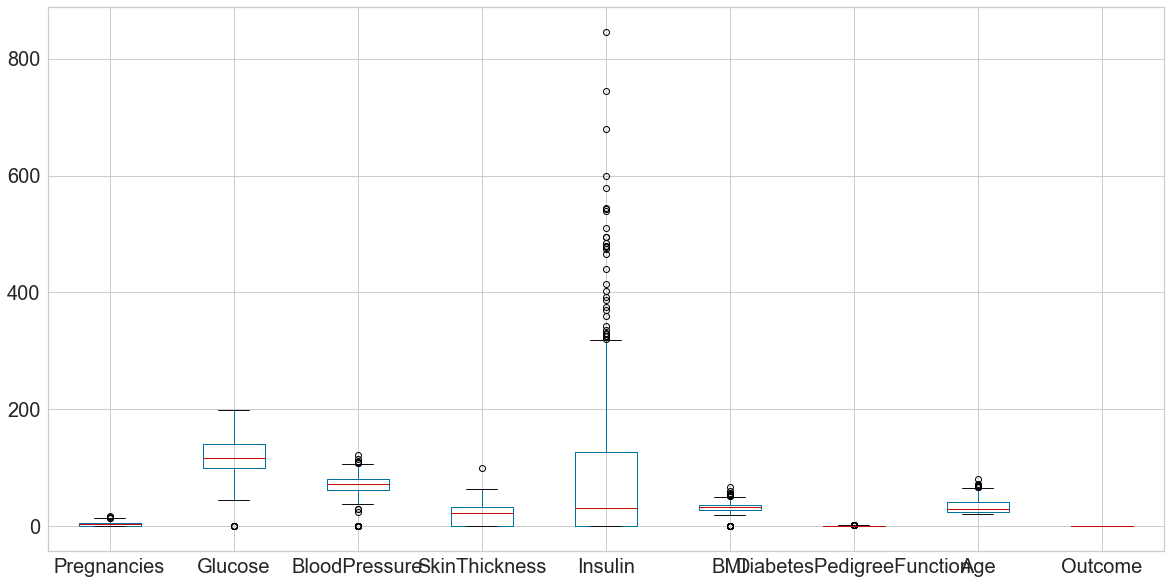

In [326]:
data.plot.box(grid='True', figsize=(20,10),fontsize=20)
#box plot to check for outliers

In [327]:
# 2 datasets
# divide dataset into diabetic and non diabetic
Diabetic = data[(data['Outcome'] != 0)]
Non_Diabetic = data[(data['Outcome'] == 0)]

In [328]:
Diabetic.head() # print few observations with diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
2            8      183             64              0        0  23.3   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   
8            2      197             70             45      543  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1

In [329]:
Non_Diabetic.head()# print few observations without diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
3             1       89             66             23       94  28.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

### The quantity of diabetic and non diabetic

<Figure size 864x576 with 0 Axes>

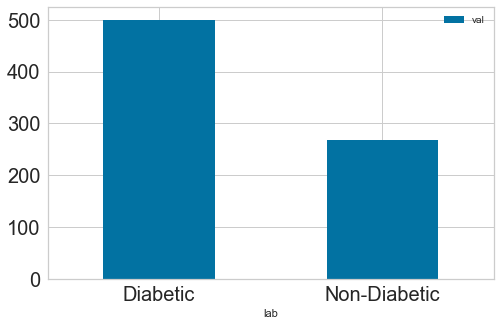

In [330]:
fig = plt.figure(figsize=(12,8))
df_1=data['Outcome'].value_counts().values.tolist()   
df = pd.DataFrame({'lab':['Diabetic', 'Non-Diabetic'], 'val':df_1})
ax = df.plot.bar(x='lab', y='val', rot=0,figsize=(8,5),fontsize=20)

In [331]:
df_1=data['Outcome'].value_counts().values.tolist()  

### The proportion of diabetic and non diabetic

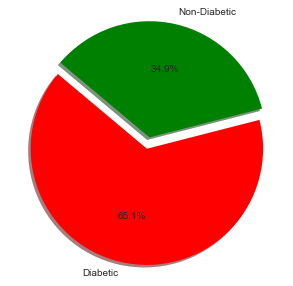

In [332]:
import matplotlib.pyplot as plt
labels = 'Diabetic', 'Non-Diabetic'
sizes = df_1
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice
fig = plt.figure(figsize=(5,5))
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.show()

### 3.	Methodology 
### •	Pre-processing on your data.

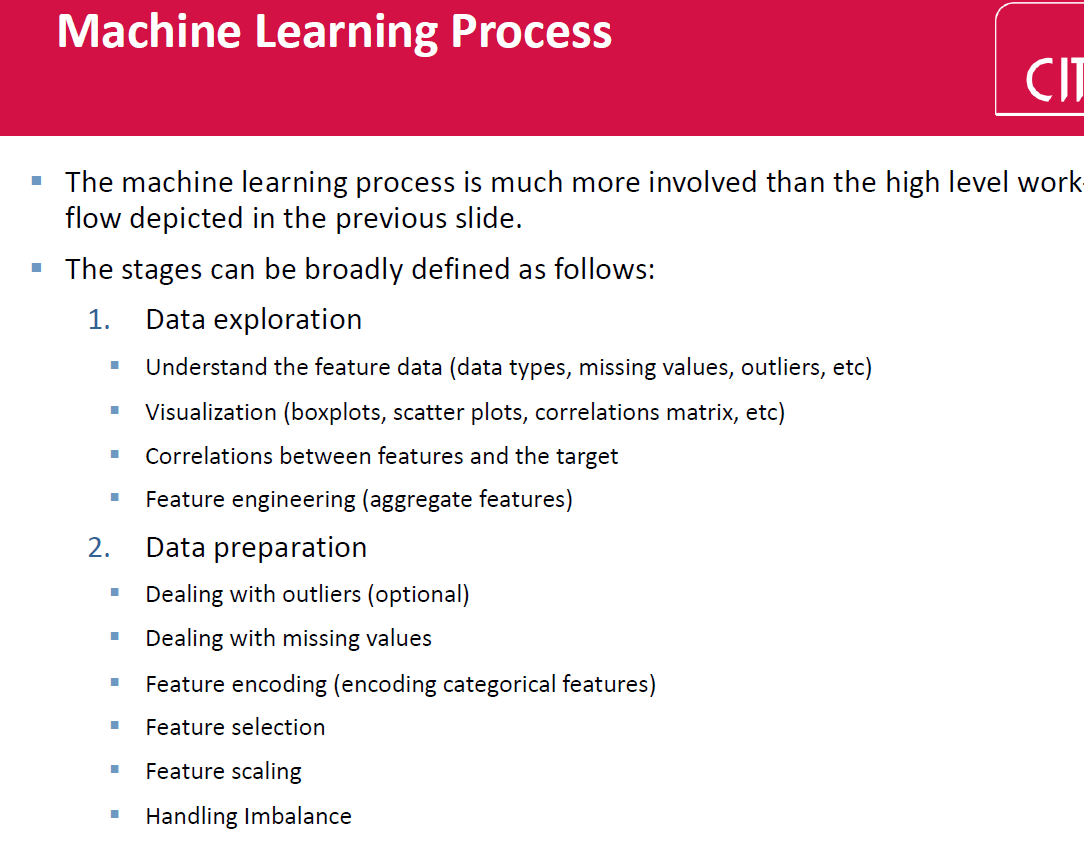

In [333]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [334]:
Missing_value=data.isnull().sum()

In [335]:
df_Missing_value = pd.DataFrame(data=Missing_value)

In [336]:
df_Missing_value

0
Pregnancies                 0
Glucose                     5
BloodPressure              35
SkinThickness             227
Insulin                   374
BMI                        11
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0

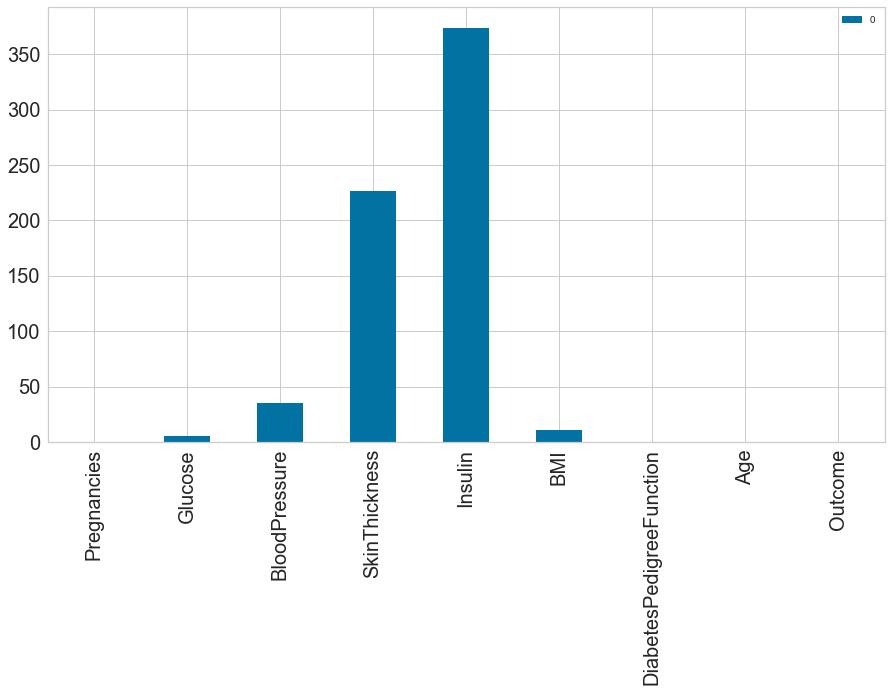

In [337]:
df_Missing_value.plot.bar( figsize=(15,8),fontsize=20)

Now, we can look at where are missing values : 

Missing values : 
* Insulin = 48.7% - 374
* SkinThickness = 29.56% - 227
* BloodPressure = 4.56% - 35
* BMI = 1.43% - 11
* Glucose = 0.65% - 5

In [338]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [339]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

In [340]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [341]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [342]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [343]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [344]:
def replace_missing(feature, var1, var2):
    data.loc[(data['Outcome'] == 0 ) & (data[feature].isnull()), feature] = var1
    data.loc[(data['Outcome'] == 1 ) & (data[feature].isnull()), feature] = var2

In [345]:
replace_missing('Insulin', 102.5, 169.5)

In [346]:
replace_missing('SkinThickness', 27.0, 32.0)

In [347]:
replace_missing('BloodPressure', 70.0, 74.5)

In [348]:
replace_missing('BMI', 30.1,34.3)

In [349]:
replace_missing('Glucose', 107.0, 140.0)

In [350]:
import seaborn as sns

In [351]:
def graphs(var):
    plt.figure(1)
    plt.subplot(121), sns.distplot(data[var])
    plt.subplot(122), data[var].plot.box(figsize=(16,5))
    plt.show()


In [352]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

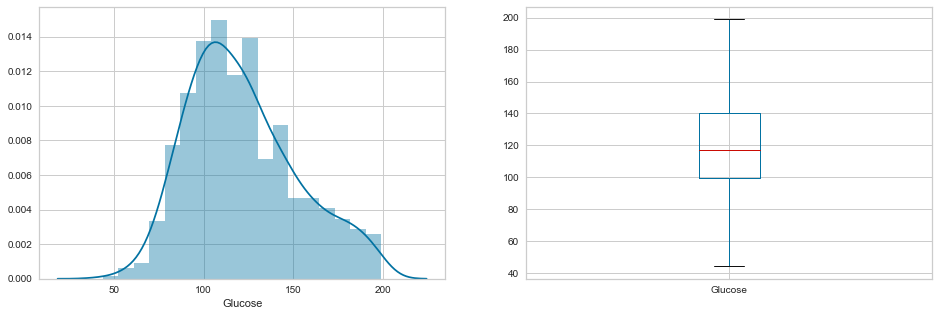

In [353]:
graphs('Glucose')

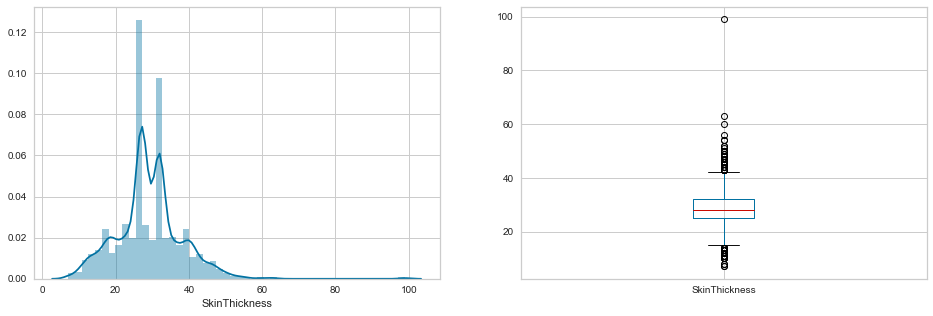

In [354]:
graphs('SkinThickness')

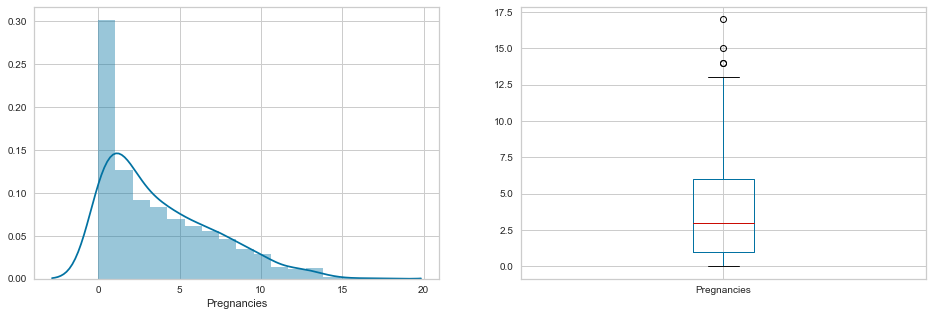

In [355]:
graphs('Pregnancies')


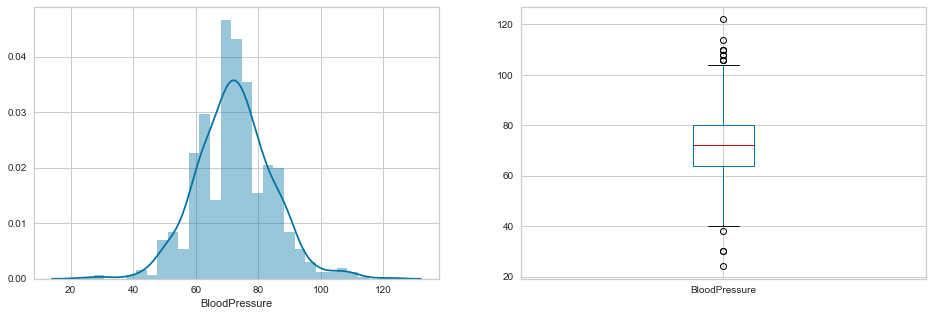

In [356]:
graphs('BloodPressure')


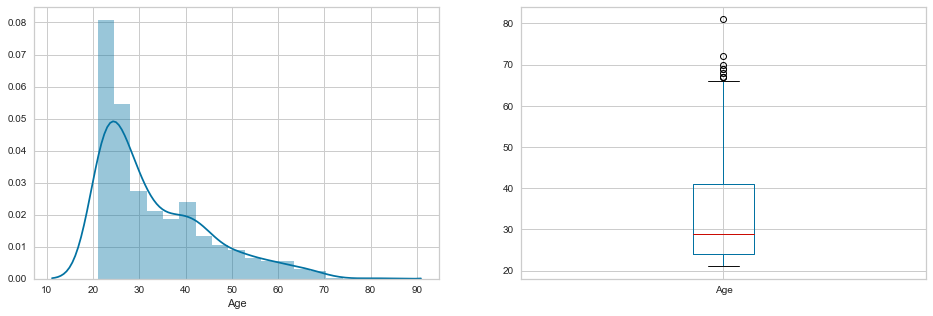

In [357]:
graphs('Age')

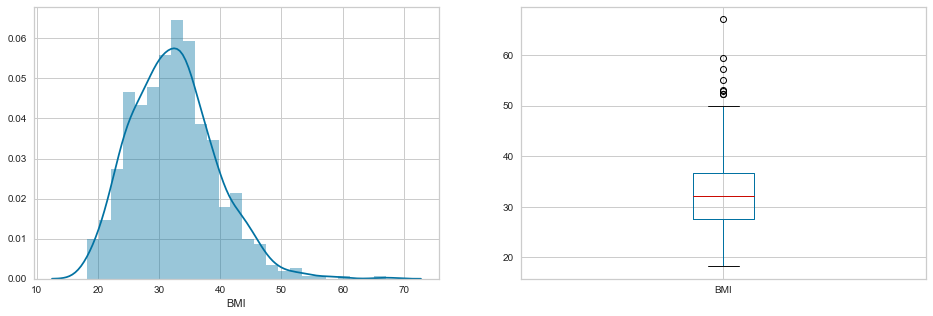

In [358]:
graphs('BMI')


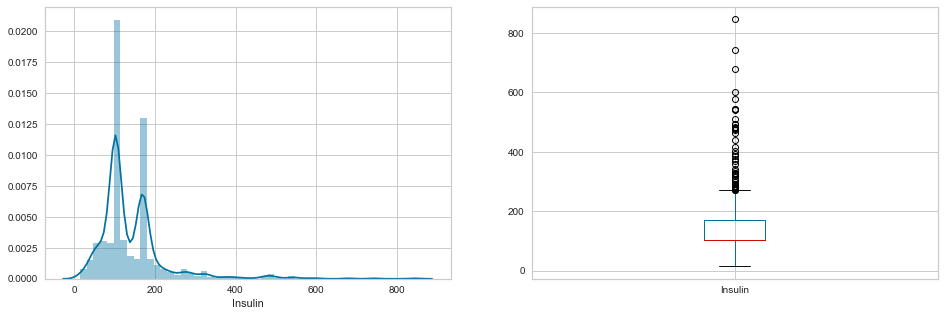

In [359]:
graphs('Insulin')


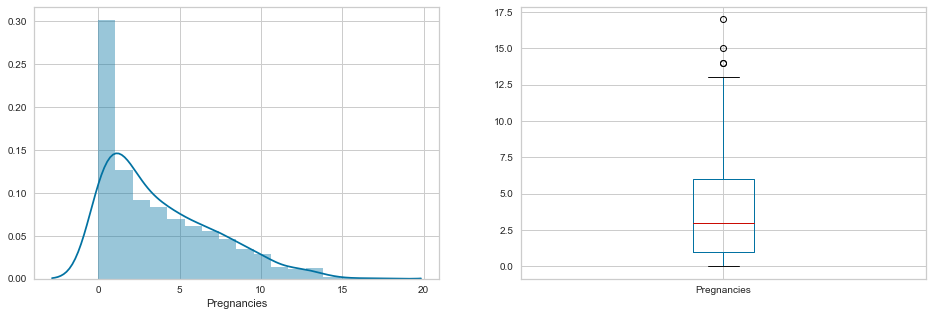

In [360]:
graphs('Pregnancies')

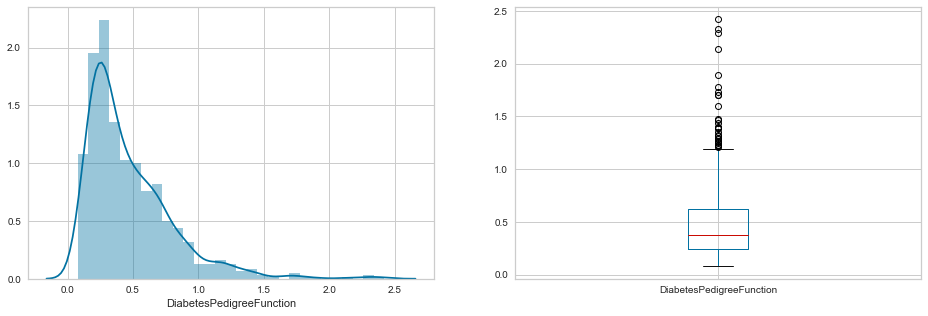

In [361]:
graphs('DiabetesPedigreeFunction')

### Correlation between all features

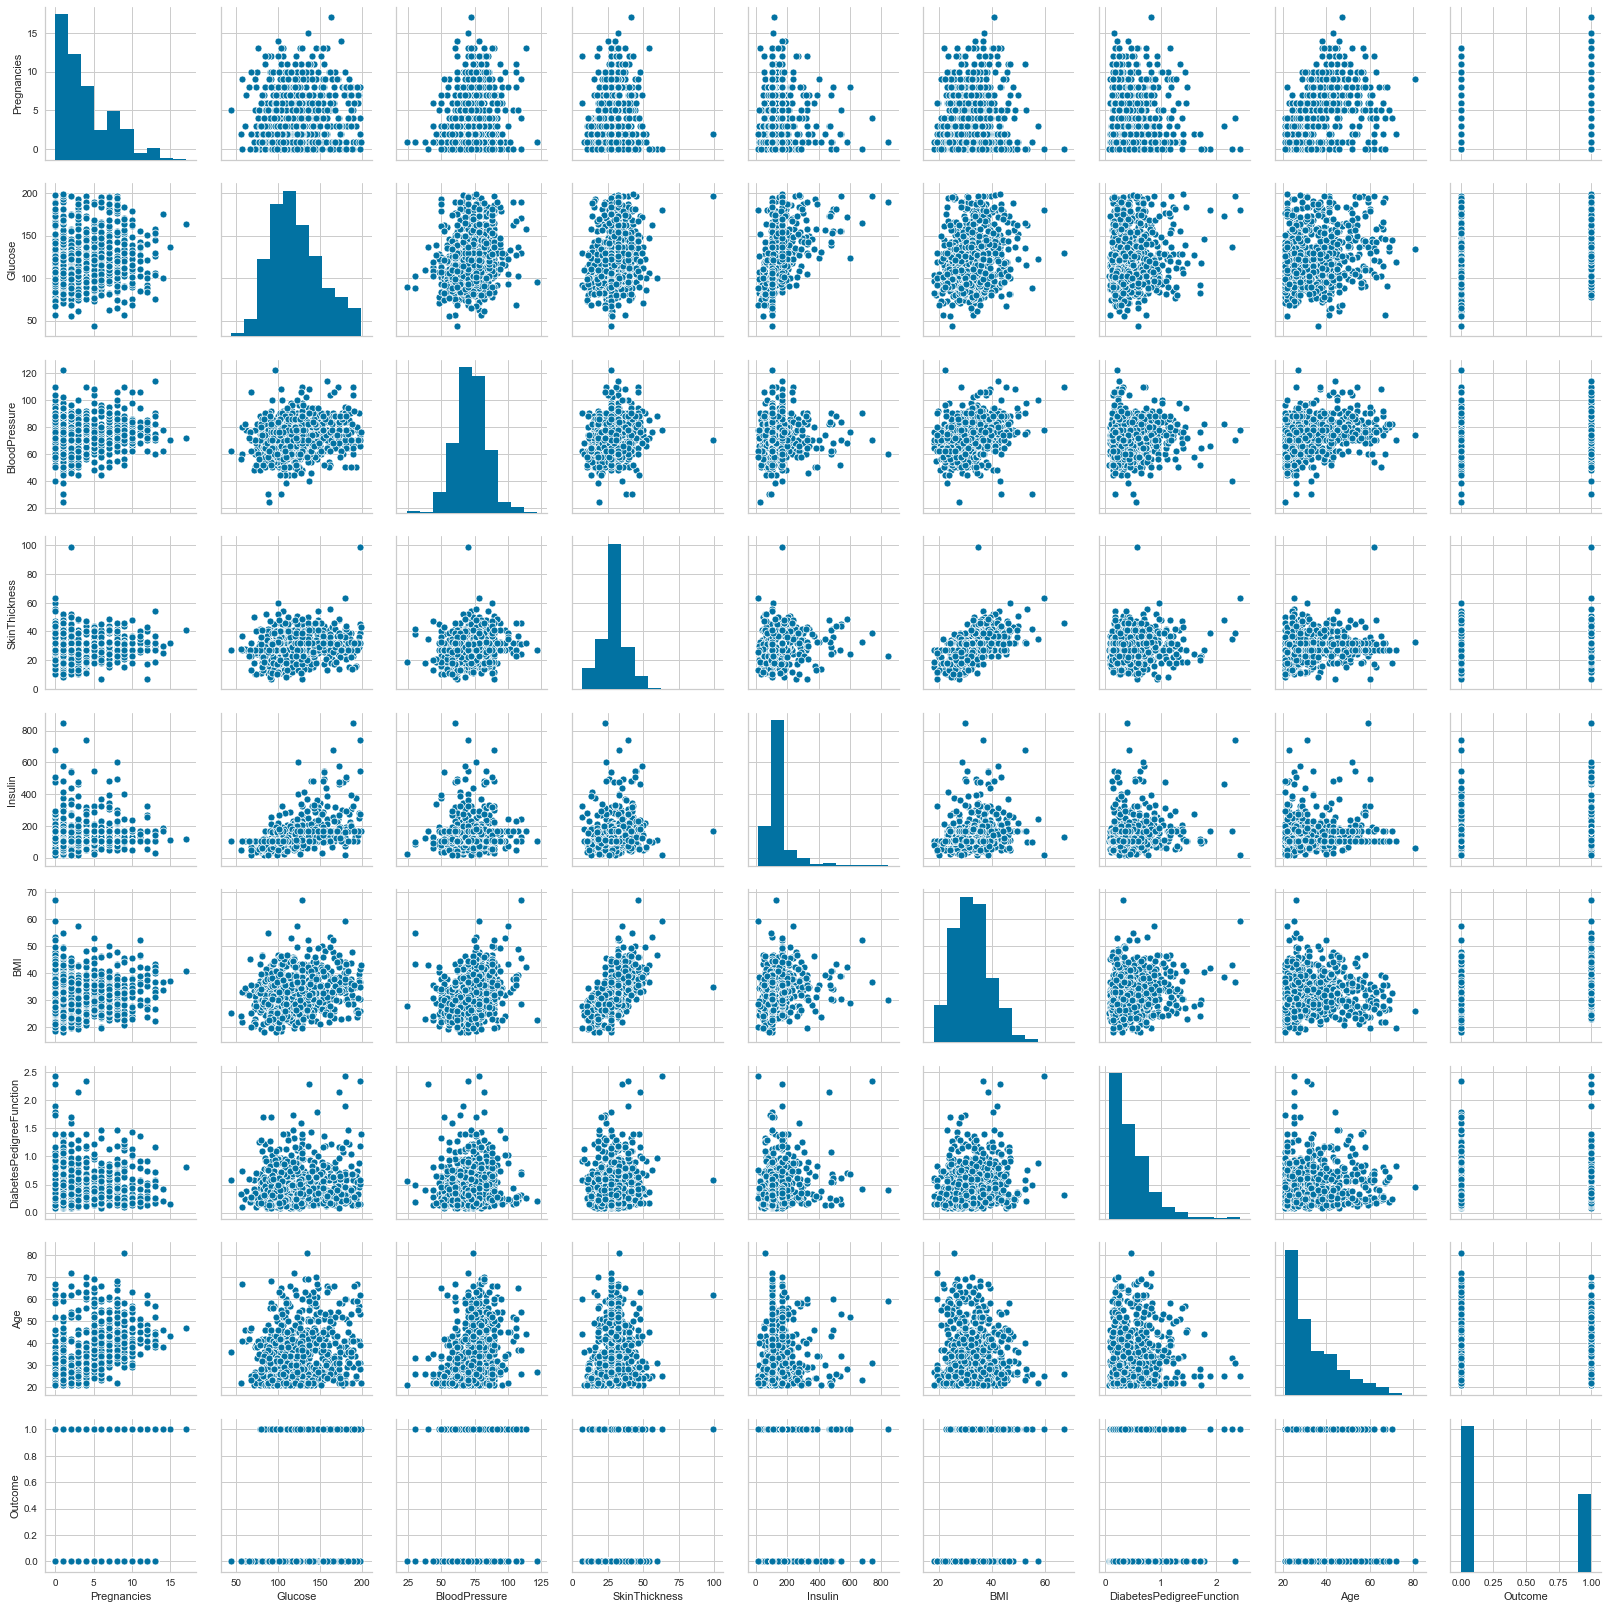

In [362]:
sns.pairplot(data)

In [363]:
Diabetic = data[(data['Outcome'] != 0)]
Non_Diabetic = data[(data['Outcome'] == 0)]

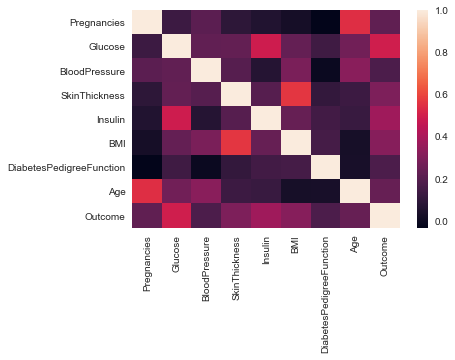

In [364]:
import pandas as com
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [365]:
import pandas as pd
import numpy as np


corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

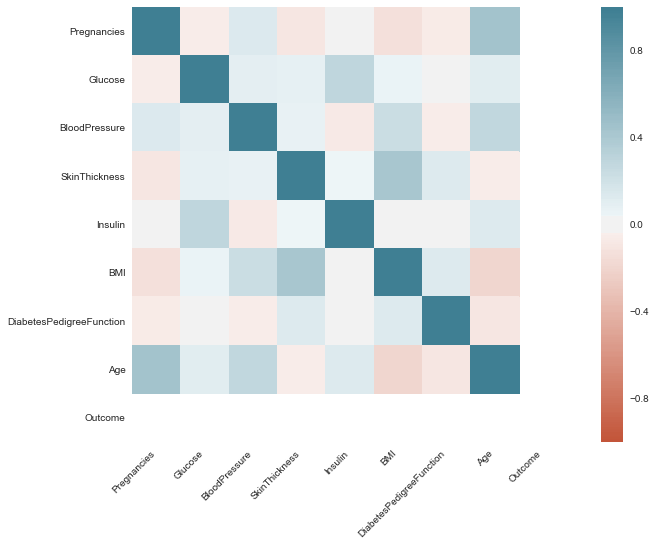

In [366]:
corr = Diabetic.corr()
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

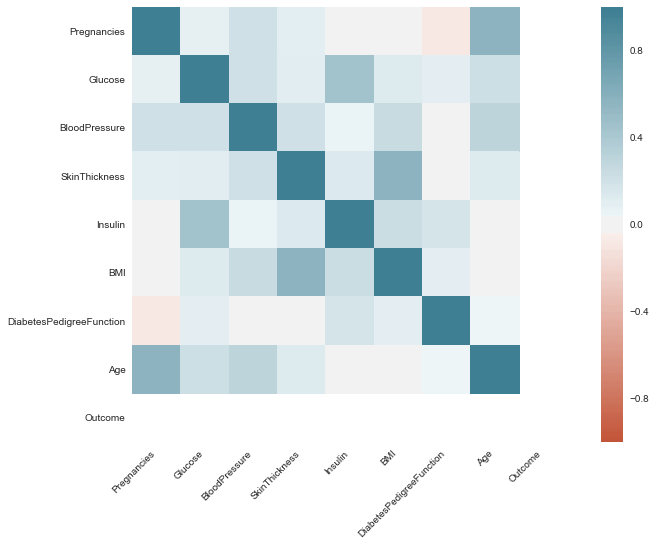

In [367]:
corr = Non_Diabetic.corr()
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [368]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1


Below, you can see the accuracy of LGBM with replacement of the NaN values by the variable's mean (same results with the median)

![](http://image.noelshack.com/fichiers/2019/06/1/1549276143-0-0-0.png)

In [369]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = Diabetic[data_select]
    tmp2 = Non_Diabetic[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Diabetic', 'Non Diabetic']
    colors = ['red', 'green']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [370]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)
plot_distribution('Glucose', 0)
plot_distribution('BloodPressure', 0)
plot_distribution('SkinThickness', 0)
plot_distribution('BMI', 0)
plot_distribution('Insulin', 0)

In [371]:

Diabetic = data[(data['Outcome'] != 0)]
Non_Diabetic = data[(data['Outcome'] == 0)]

In [372]:
import numpy as np
import matplotlib.pyplot as plt

def Scatter_plot(var_select, sub) :
    g1 = (Diabetic[[var_select]], Diabetic[[sub]] )                                       
    g2 = (Non_Diabetic[[var_select]], Non_Diabetic[[sub]])                                     

   
    data1 = (g1, g2)
    colors = ("red", "green")
    groups = ("Diabetic", "Non_Diabetic")
    # Create plot
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1, 1, 1)

    for data, color, group in zip(data1, colors, groups):
        x,y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.title('Matplot scatter plot')
    plt.ylabel(sub)
    plt.xlabel(var_select)
    plt.legend(loc=2)
    plt.show()

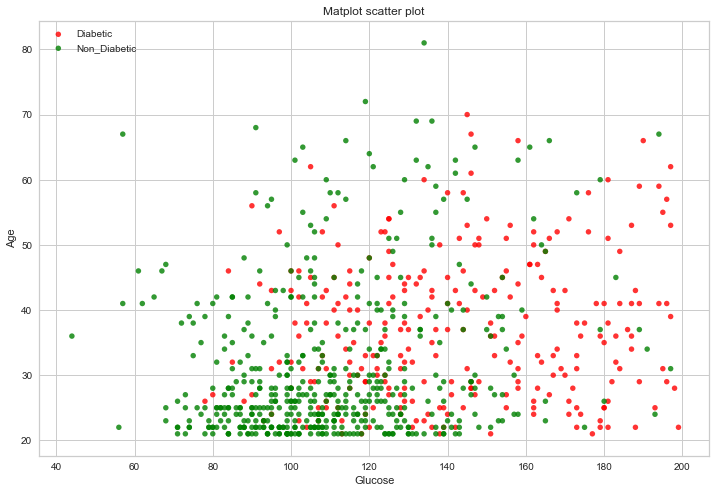

In [373]:
Scatter_plot('Glucose', 'Age')

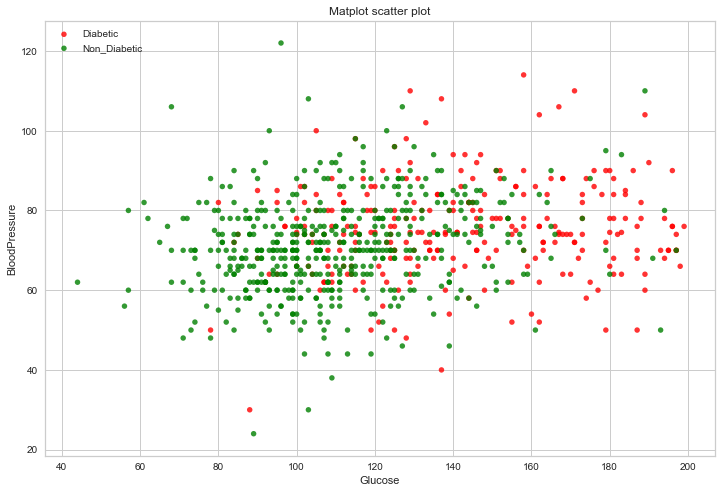

In [374]:
Scatter_plot('Glucose', 'BloodPressure')

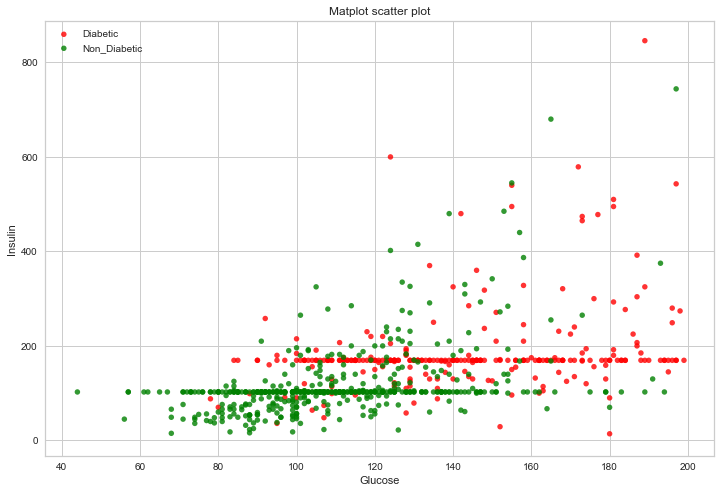

In [375]:
Scatter_plot('Glucose', 'Insulin')

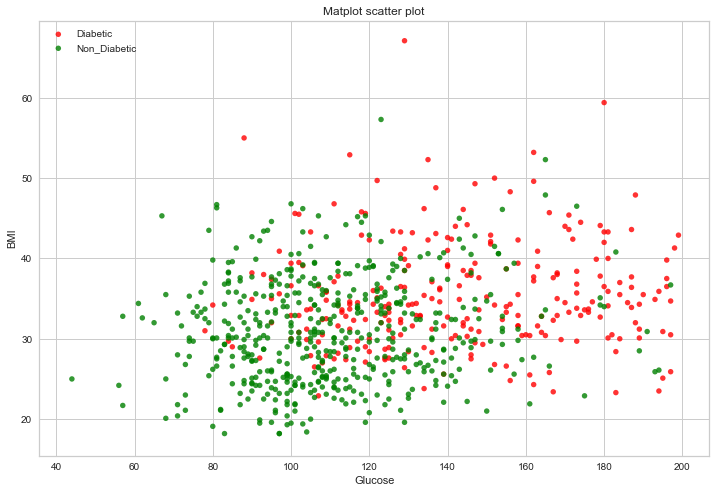

In [376]:
Scatter_plot('Glucose', 'BMI')

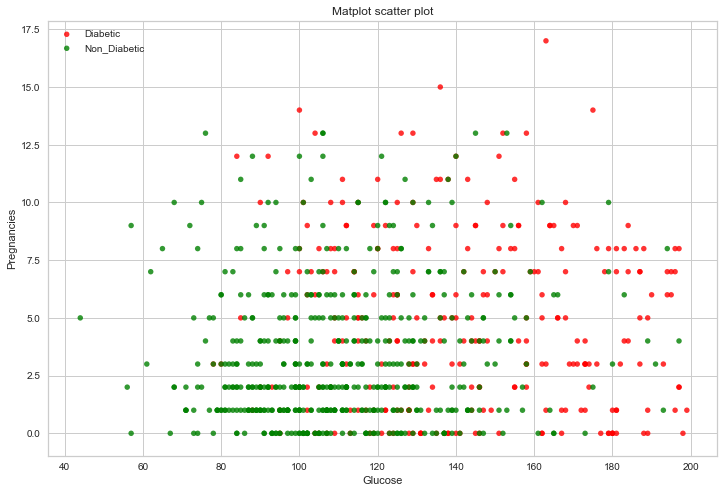

In [377]:
Scatter_plot('Glucose', 'Pregnancies')

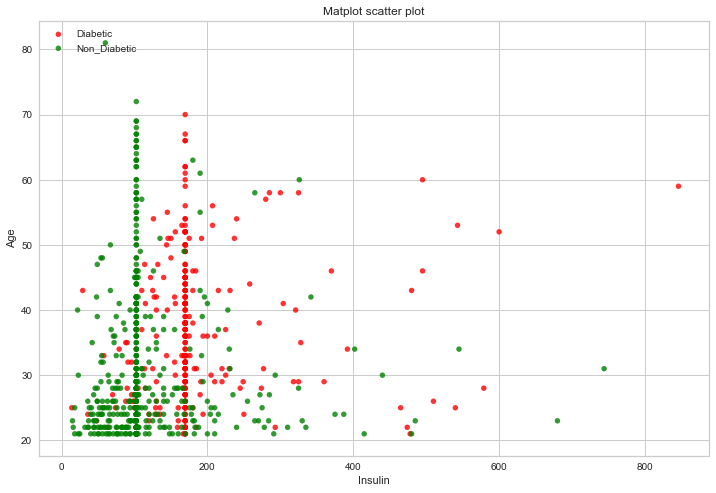

In [378]:
Scatter_plot('Insulin','Age')

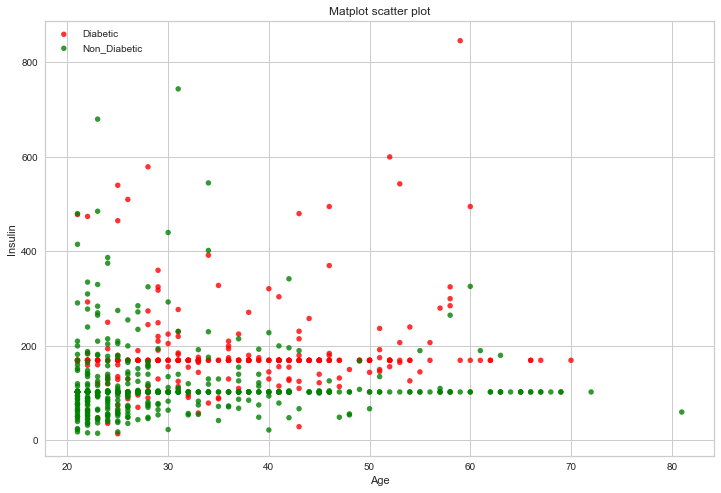

In [379]:
Scatter_plot('Age','Insulin')

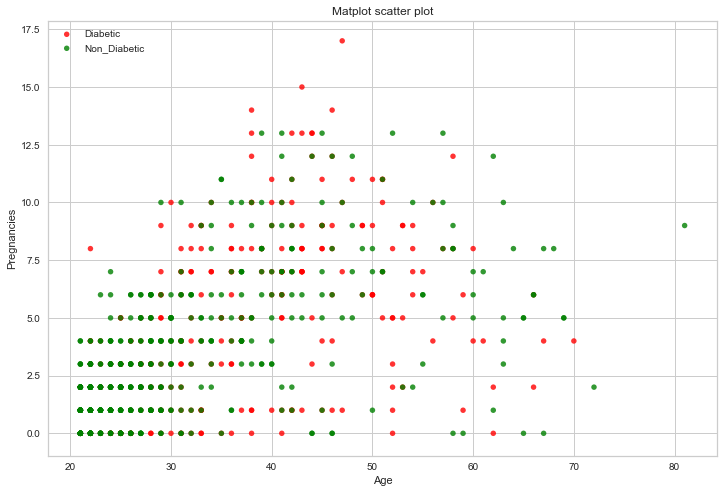

In [380]:
Scatter_plot('Age', 'Pregnancies')

For Diabetic people, Glucose is already high

then, the correlation is not so positive, it is almost neutral

In [381]:

def correlatio_plot(var1,var2):
    # use the function regplot to make a scatterplot
    fig = plt.figure(figsize=(12,8))
    sns.regplot(x=Diabetic[var1], y=Diabetic[var2],scatter_kws={"color": "red"})
    fig = plt.figure(figsize=(12,8))
    sns.regplot(x=Non_Diabetic[var1], y=Non_Diabetic[var2], scatter_kws={"color": "green"})
   

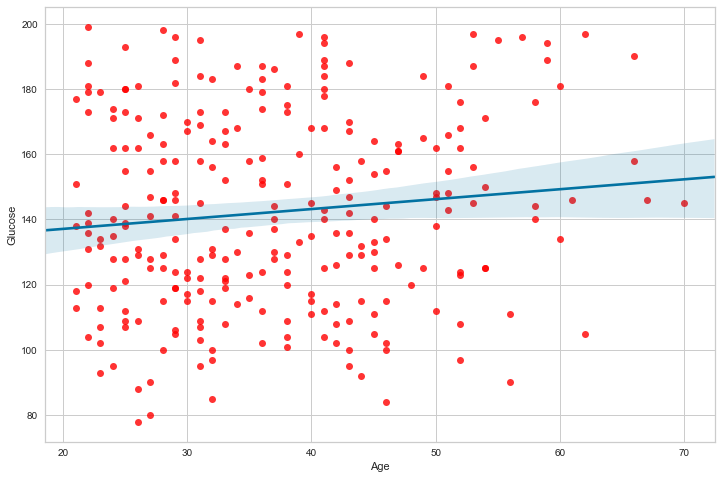

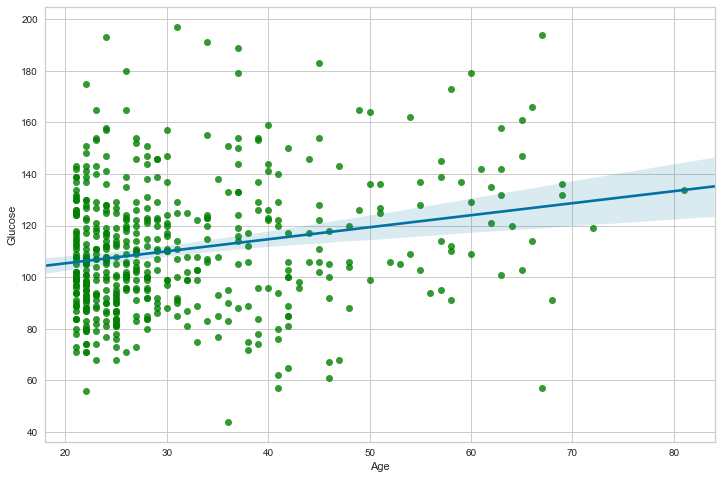

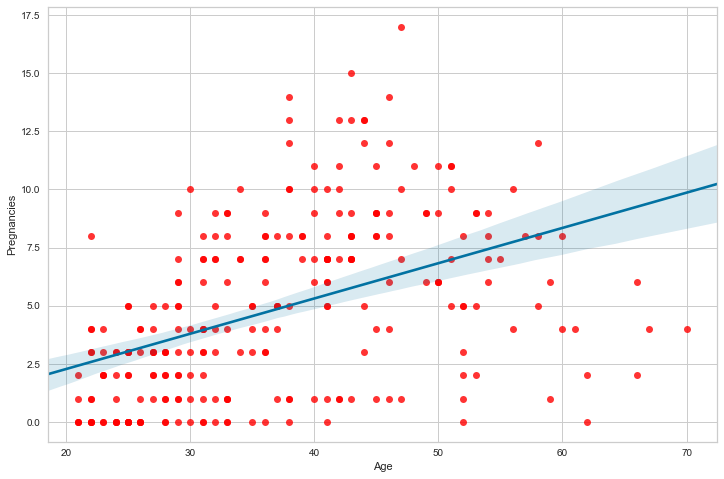

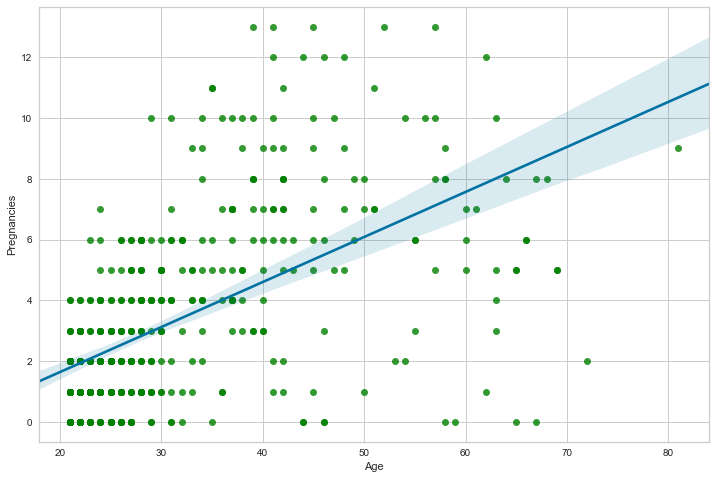

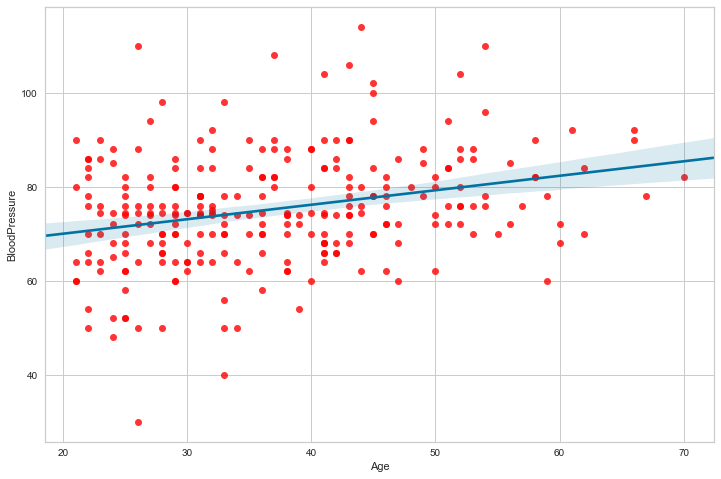

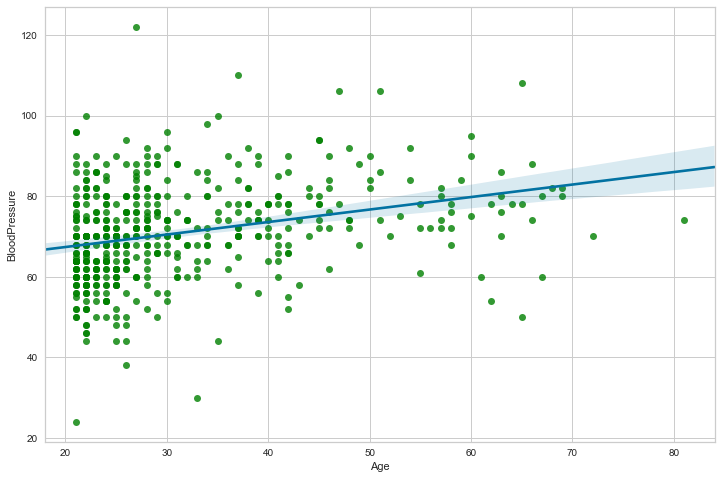

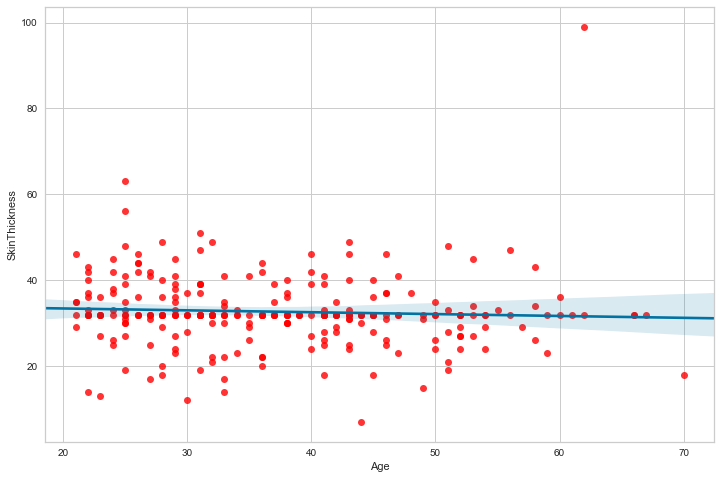

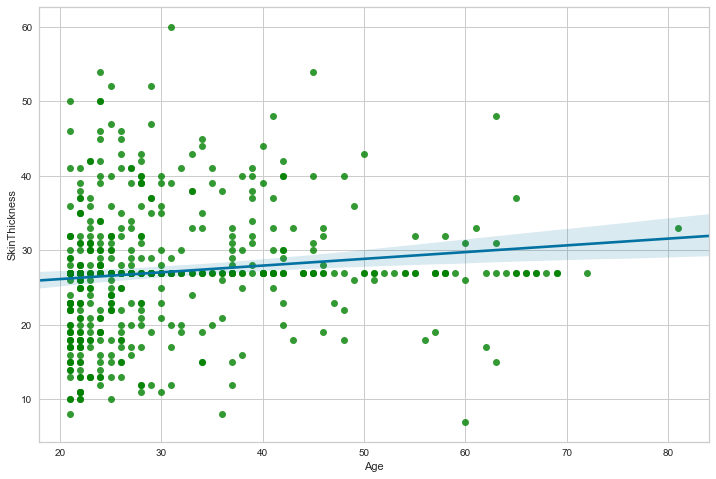

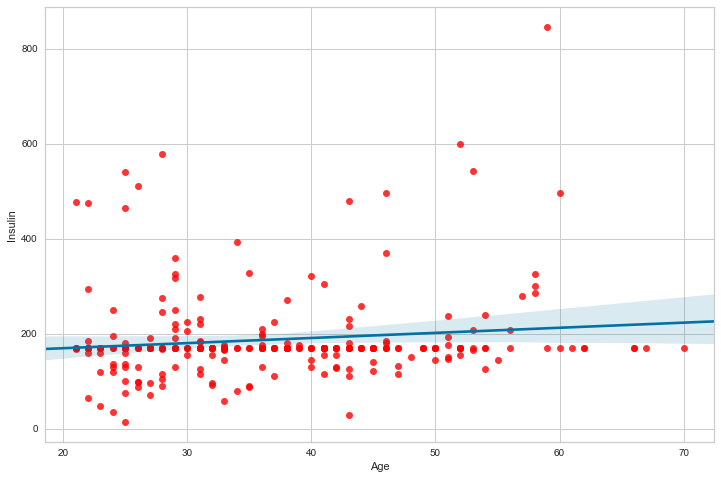

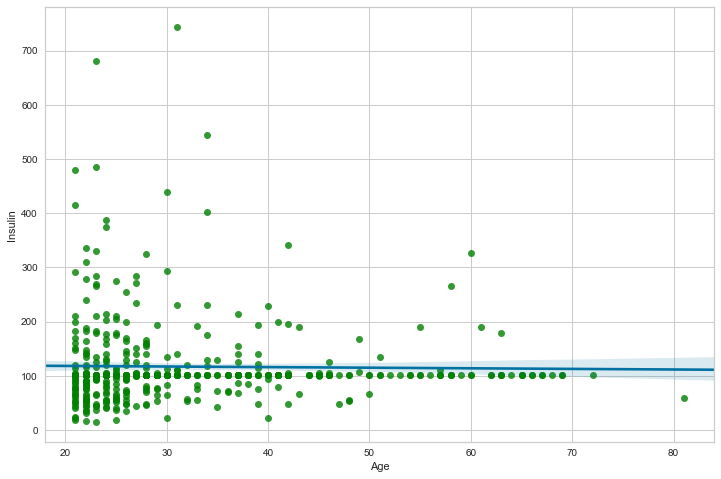

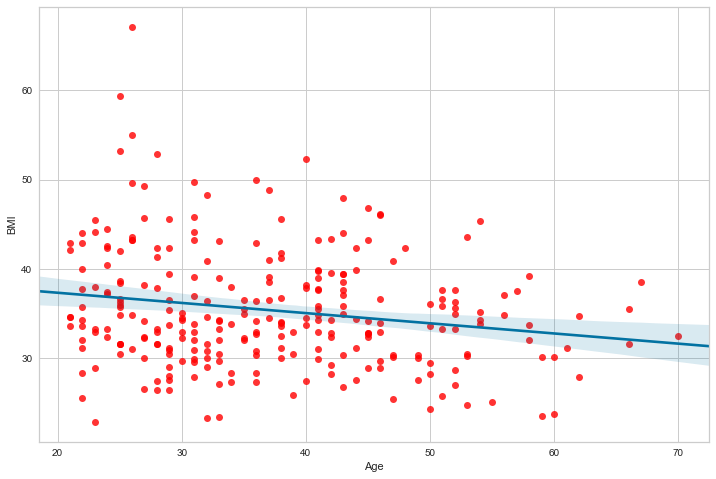

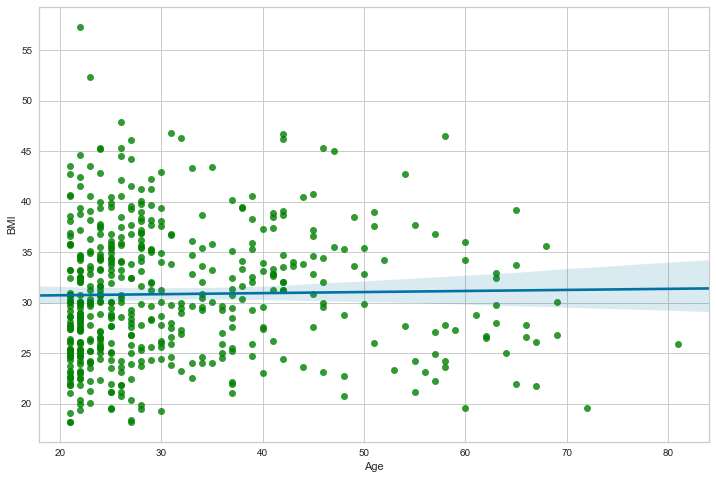

In [382]:
correlatio_plot('Age','Glucose')
correlatio_plot('Age','Pregnancies')
correlatio_plot('Age','BloodPressure')
correlatio_plot('Age','SkinThickness')
correlatio_plot('Age','Insulin')
correlatio_plot('Age','BMI')

In [383]:
Diabetic.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000 -0.053099       0.135913      -0.090287   
Glucose                     -0.053099  1.000000       0.100043       0.084499   
BloodPressure                0.135913  0.100043       1.000000       0.074598   
SkinThickness               -0.090287  0.084499       0.074598       1.000000   
Insulin                     -0.022852  0.293314      -0.073859       0.046827   
BMI                         -0.132214  0.056904       0.237610       0.426322   
DiabetesPedigreeFunction    -0.069195  0.027337      -0.058297       0.127573   
Age                          0.444987  0.113023       0.283348      -0.056491   
Outcome                           NaN       NaN            NaN            NaN   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.022852 -0.132214                 -0.069195   
Glucose                   0.293314  0.056904                  0.027337   
BloodPressure            -0.073859  0.237610                 -0.058297   
SkinThickness             0.046827  0.426322                  0.127573   
Insulin                   1.000000 -0.002512                 -0.027155   
BMI                      -0.002512  1.000000                  0.118881   
DiabetesPedigreeFunction -0.027155  0.118881                  1.000000   
Age                       0.125522 -0.189653                 -0.088119   
Outcome                        NaN       NaN                       NaN   

                               Age  Outcome  
Pregnancies               0.444987      NaN  
Glucose                   0.113023      NaN  
BloodPressure             0.283348      NaN  
SkinThickness            -0.056491      NaN  
Insulin                   0.125522      NaN  
BMI                      -0.189653      NaN  
DiabetesPedigreeFunction -0.088119      NaN  
Age                       1.000000      NaN  
Outcome                        NaN      NaN

In [384]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']


In [385]:
Diabetic = data[(data['Outcome'] != 0)]
Non_Diabetic = data[(data['Outcome'] == 0)]

In [386]:
plot_distribution('N0', 0)
plot_distribution('N8', 0)
plot_distribution('N13', 0)
plot_distribution('N12', 0)
plot_distribution('N14', 0)

In [387]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [388]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                    font = dict(size = 15)),
        cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                           np.round(df['accuracy'],3),
                           np.round(df['precision'],3),
                           np.round(df['recall'],3),
                           np.round(df['f1'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')

In [389]:
# Def X and Y
X = data.drop('Outcome', 1)
y = data['Outcome']

### c.	Building Training/Validation/Test Samples

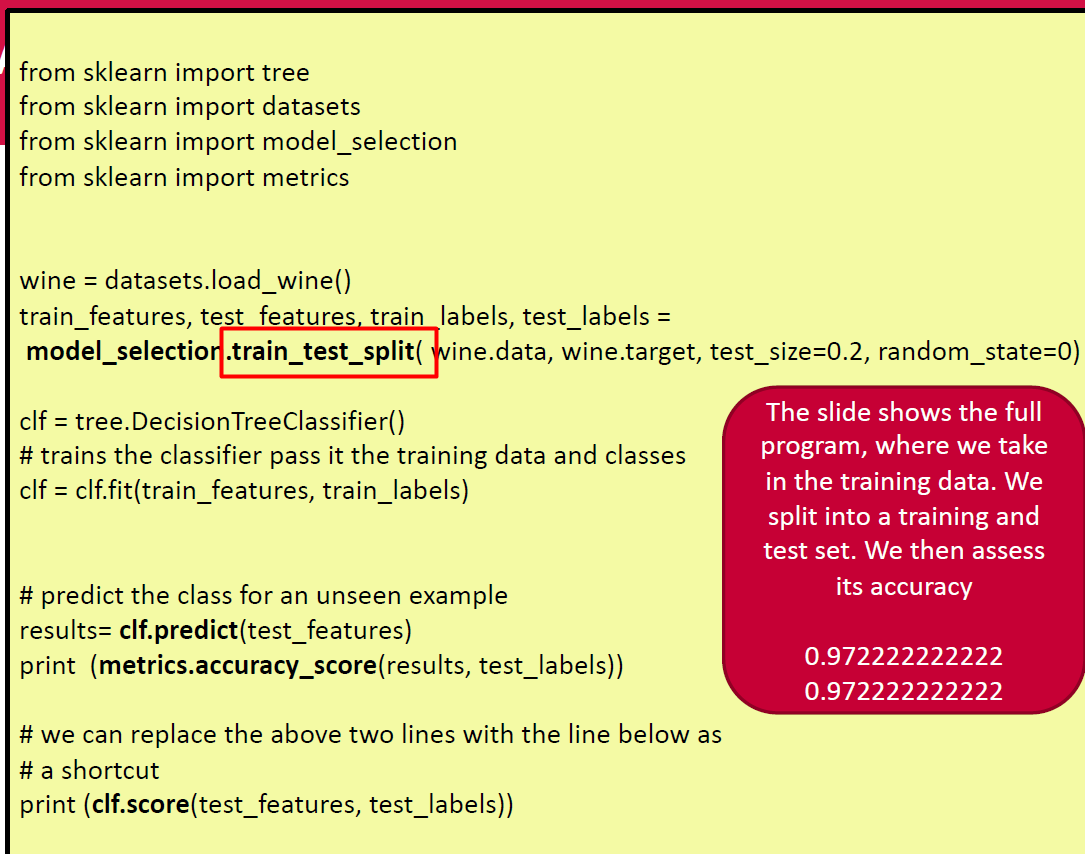

In [390]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [391]:
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

### •	Hyper-parameter optimization

In [392]:
random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.3min finished


In [393]:
scores_table(lgbm_clf, 'LightGBM')

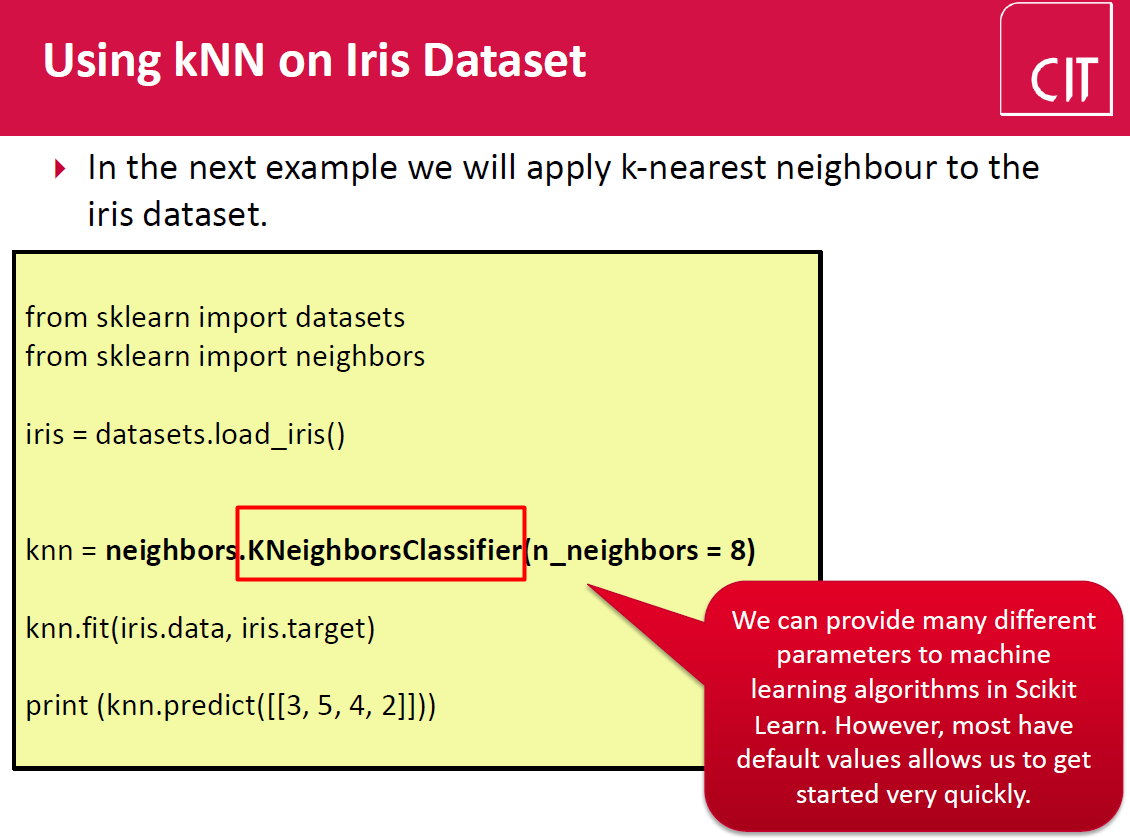

### d.	Model Selection and
### e.	K nearest neighbors (KNN)

In [394]:
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_clf),
    ('knn', KNeighborsClassifier())], voting='soft', weights = [1,1])

params = {
      'knn__n_neighbors': np.arange(1,30)
      }
      
grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)

grid.fit(X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Best Score:0.9010416666666666
Best Parameters: {'knn__n_neighbors': 28}


In [395]:
scores_table(voting_clf, 'LightGBM & KNN')

In [396]:
#Building model using XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [397]:
xgb_pred = xgb_model.predict(X_test)

In [398]:
#Getting accuracy score for XGBoost

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.8700787401574803


In [399]:
#Metrics for XGBoost
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[148  14]
 [ 19  73]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       162
           1       0.84      0.79      0.82        92

    accuracy                           0.87       254
   macro avg       0.86      0.85      0.86       254
weighted avg       0.87      0.87      0.87       254



In [400]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

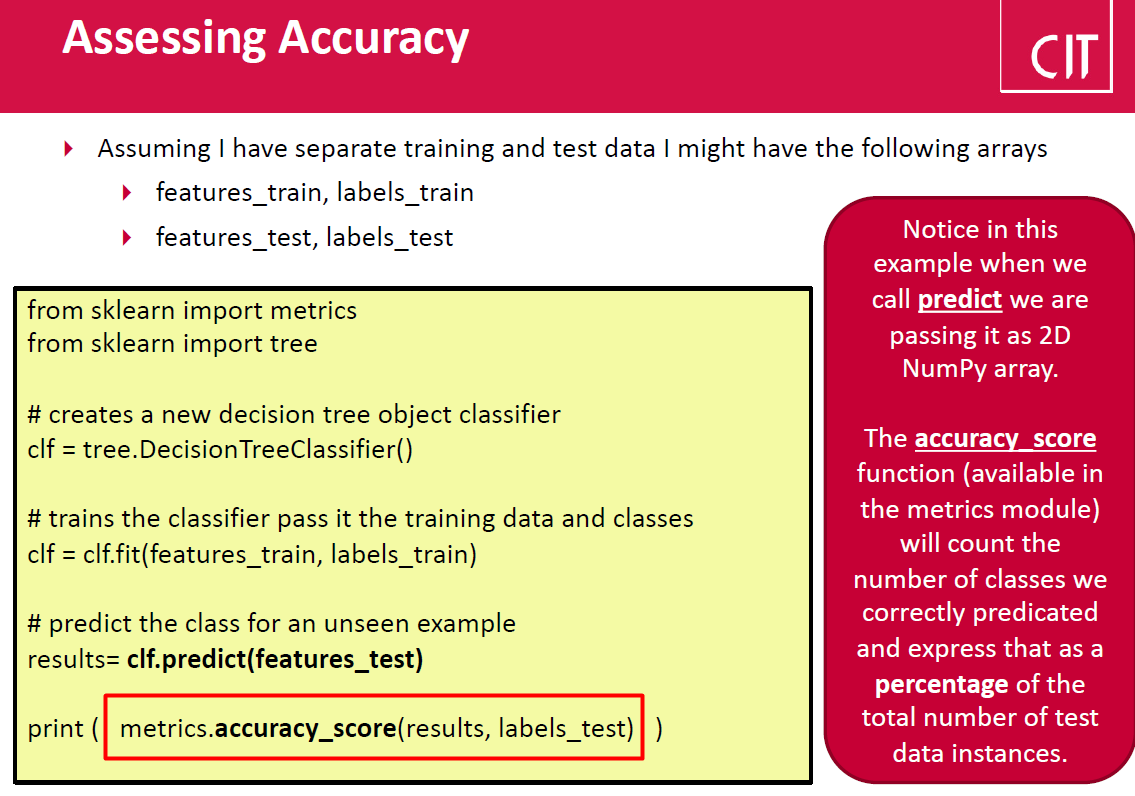

In [401]:
#Predict
svc_pred = svc_model.predict(X_test)

In [402]:
#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8385826771653543


In [403]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[144  18]
 [ 23  69]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       162
           1       0.79      0.75      0.77        92

    accuracy                           0.84       254
   macro avg       0.83      0.82      0.82       254
weighted avg       0.84      0.84      0.84       254



In [404]:
#Getting feature importances
xgb_model.feature_importances_

array([0.03342632, 0.07685319, 0.04427028, 0.04560254, 0.36009687,
       0.0446239 , 0.04574387, 0.09719091, 0.07722323, 0.03042366,
       0.02994359, 0.05175748, 0.06284423], dtype=float32)

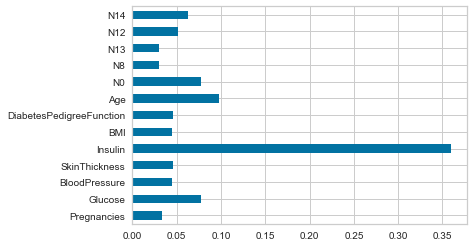

In [405]:
#Plotting feature importances
(pd.Series(xgb_model.feature_importances_, index=X.columns)
   .plot(kind='barh'))  